# Clasificación Avanzada FLOWERS

#### Description

- Build and/or obtain a data set of images of flower arrangements or bouquets. It should contain at least 10 flower categories and at least 25 images for each type of flower or flower arrangement. 

- Generate training and test data at 80-20.
    - In the Orange tool generate Image Embeddings for each of these data sets with Inception V3. 
    - Save the Image Embedding data and with this develop the classifier in Python.
- Try at least two variants for each of the following classifiers:
    - Logistic Regression 
    - Neural Networks 
    - SVM
    - Random Forest
- Measure the performance of the models and their variants, obtain and analyze the confusion matrix.
    - With which flower type were the best results achieved? 
    - Which flower was the most difficult to classify? 
    - Which model obtained the best results? 
    - How do you think you can improve the results obtained? 
    - How do the results vary between the training and test data sets?

## 0. Library import
We import all the required Python libraries

In [1]:
# Data manipulation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split # split train and test set

# Data visualization
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Model metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

# Algorithms
# Logistic Regression 
from sklearn.linear_model import LogisticRegression
# SVM
from sklearn import svm
# Random Forest 
from sklearn.ensemble import RandomForestClassifier
# Neural Network (MLP) 
from sklearn.neural_network import MLPClassifier

# Function to draw confusion matrix
def draw_confusion_matrix(true, preds, cmap, title):
    # Set Figure
    fig = plt.figure(figsize=(16, 14)) 
    # Fill matrix
    conf_matx = confusion_matrix(true, preds)
    # Plot Confusion matrix
    sns.heatmap(conf_matx, annot=True,annot_kws={"size": 12},fmt='g', cbar=True, cmap=cmap)
    plt.xlabel('Predicted Values')
    plt.ylabel('True Values');
    plt.title(title)

# 1. Read Data

- Build and/or obtain a data set of images of flower arrangements or bouquets. It should contain at least 10 flower categories and at least 25 images for each type of flower or flower arrangement. 

Retrieve all the required data for the analysis. Based on Oxford 102 Flower Pytorch, found at https://www.kaggle.com/c/oxford-102-flower-pytorch/data I selected 24 categories, and change the folders name to match the flower name as instructed before using Orange. After the embedding the resulting csv was saved:

In [2]:
#displaying the dataset

df = pd.read_csv('.\\Embedded images.csv')

C:\Users\is688\AppData\Local\Temp\ipykernel_9024\1315997216.py:3: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,2

In [3]:
df

,n0,n1,n2,n3,n4,n5,n6,n7,n8,n9,...,n2044,n2045,n2046,n2047,category,image name,image,size,width,height
0,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,...,continuous,continuous,continuous,continuous,azalea bee-balm blackberry-lily canna-lily cor...,string,string,continuous,continuous,continuous
1,hidden=True,hidden=True,hidden=True,hidden=True,hidden=True,hidden=True,hidden=True,hidden=True,hidden=True,hidden=True,...,hidden=True,hidden=True,hidden=True,hidden=True,class,meta,meta origin=C:/Users/is688/Jupyter/FLOWERS/IMA...,meta,meta,meta
2,0.3504636585712433,0.0938640609383583,0.7983770966529846,0.6084038615226746,0.9785415530204773,0.23260997235774994,0.017328955233097076,0.6554049849510193,0.00962686724960804,0.17767305672168732,...,1.391684889793396,0.13622786104679108,0.6101861000061035,0.8039185404777527,azalea,image_03545,azalea/image_03545.jpg,42606,667,500
3,0.13816016912460327,0.03224954381585121,1.3028169870376587,0.6343207359313965,0.7857036590576172,0.25814226269721985,0.1564691960811615,0.6087602376937866,0.19420085847377777,0.14608943462371826,...,1.3673428297042847,1.1044305562973022,0.6384803652763367,0.38450726866722107,azalea,image_03546,azalea/image_03546.jpg,54039,644,500
4,0.18509168922901154,0.03259287774562836,1.3997554779052734,0.3724135458469391,0.6311536431312561,0.08028822392225266,0.0027746360283344984,0.3137480914592743,0.09969492256641388,0.27347511053085327,...,1.7720478773117065,0.38598716259002686,0.3593994379043579,0.6000104546546936,azalea,image_03548,azalea/image_03548.jpg,45688,667,500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1607,0.106887,0.154522,0.743871,0.503185,0.67325,0.017479,0.087993,0.787335,0.004472,0.082931,...,0.100938,0.112664,0.041096,0.0695,windflower,image_06006,windflower/image_06006.jpg,32361,500,791
1608,0.203937,0.082632,0.520509,0.610591,0.553318,0.002241,0.049273,0.356401,0.035481,0.083858,...,0.147914,0.457661,0.016464,0.098473,windflower,image_06007,windflower/image_06007.jpg,32564,500,667
1609,0.153278,0.059221,0.720062,0.402319,0.457232,0.053827,0.118807,0.621211,0.004615,0.095909,...,1.03322,0.017644,0.115186,0.154158,windflower,image_06008,windflower/image_06008.jpg,41962,500,665
1610,0.230262,0.226341,1.098367,1.052952,0.927374,0.117871,0.173736,0.97822,0.002011,0.017473,...,0.531536,0.274956,0.008775,0.499583,windflower,image_06009,windflower/image_06009.jpg,46770,750,500


The data set contains 2048 n descriptors plus category, image name, image (path), size, width, and height.

# 2. Data Preprocessing

Next, I will delete the unneeded rows and columns.

In [4]:
df = df.drop(labels=[0,1], axis=0)

In [5]:
df

,n0,n1,n2,n3,n4,n5,n6,n7,n8,n9,...,n2044,n2045,n2046,n2047,category,image name,image,size,width,height
2,0.3504636585712433,0.0938640609383583,0.7983770966529846,0.6084038615226746,0.9785415530204773,0.23260997235774994,0.017328955233097076,0.6554049849510193,0.00962686724960804,0.17767305672168732,...,1.391684889793396,0.13622786104679108,0.6101861000061035,0.8039185404777527,azalea,image_03545,azalea/image_03545.jpg,42606,667,500
3,0.13816016912460327,0.03224954381585121,1.3028169870376587,0.6343207359313965,0.7857036590576172,0.25814226269721985,0.1564691960811615,0.6087602376937866,0.19420085847377777,0.14608943462371826,...,1.3673428297042847,1.1044305562973022,0.6384803652763367,0.38450726866722107,azalea,image_03546,azalea/image_03546.jpg,54039,644,500
4,0.18509168922901154,0.03259287774562836,1.3997554779052734,0.3724135458469391,0.6311536431312561,0.08028822392225266,0.0027746360283344984,0.3137480914592743,0.09969492256641388,0.27347511053085327,...,1.7720478773117065,0.38598716259002686,0.3593994379043579,0.6000104546546936,azalea,image_03548,azalea/image_03548.jpg,45688,667,500
5,0.17522966861724854,0.008617336861789227,1.5310462713241577,0.17120158672332764,0.4303698241710663,0.10648146271705627,0.12426640093326569,0.7026468515396118,0.03608044609427452,0.4637209177017212,...,1.4879016876220703,0.23011276125907898,0.2032937854528427,0.47340381145477295,azalea,image_03549,azalea/image_03549.jpg,41153,752,500
6,0.04724534973502159,0.22780020534992218,1.0396664142608643,0.18432116508483887,0.5757237076759338,0.047315243631601334,0.2392122894525528,0.23451948165893555,0.07058814913034439,0.037750568240880966,...,0.825471818447113,0.43324992060661316,0.6638912558555603,0.33717817068099976,azalea,image_03550,azalea/image_03550.jpg,46122,667,500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1607,0.106887,0.154522,0.743871,0.503185,0.67325,0.017479,0.087993,0.787335,0.004472,0.082931,...,0.100938,0.112664,0.041096,0.0695,windflower,image_06006,windflower/image_06006.jpg,32361,500,791
1608,0.203937,0.082632,0.520509,0.610591,0.553318,0.002241,0.049273,0.356401,0.035481,0.083858,...,0.147914,0.457661,0.016464,0.098473,windflower,image_06007,windflower/image_06007.jpg,32564,500,667
1609,0.153278,0.059221,0.720062,0.402319,0.457232,0.053827,0.118807,0.621211,0.004615,0.095909,...,1.03322,0.017644,0.115186,0.154158,windflower,image_06008,windflower/image_06008.jpg,41962,500,665
1610,0.230262,0.226341,1.098367,1.052952,0.927374,0.117871,0.173736,0.97822,0.002011,0.017473,...,0.531536,0.274956,0.008775,0.499583,windflower,image_06009,windflower/image_06009.jpg,46770,750,500


In [6]:
# Delete multiple columns from the DataFrame
# Here - we provide a list to the drop() function
df = df.drop(labels=["image name","image","size", "width", "height"], axis=1)

In [7]:
df

,n0,n1,n2,n3,n4,n5,n6,n7,n8,n9,...,n2039,n2040,n2041,n2042,n2043,n2044,n2045,n2046,n2047,category
2,0.3504636585712433,0.0938640609383583,0.7983770966529846,0.6084038615226746,0.9785415530204773,0.23260997235774994,0.017328955233097076,0.6554049849510193,0.00962686724960804,0.17767305672168732,...,0.10895685106515884,0.00046633792226202786,0.10650479048490524,0.014420224353671074,0.013242087326943874,1.391684889793396,0.13622786104679108,0.6101861000061035,0.8039185404777527,azalea
3,0.13816016912460327,0.03224954381585121,1.3028169870376587,0.6343207359313965,0.7857036590576172,0.25814226269721985,0.1564691960811615,0.6087602376937866,0.19420085847377777,0.14608943462371826,...,0.08079057186841965,0.0,0.06275472044944763,0.20260116457939148,0.22952209413051605,1.3673428297042847,1.1044305562973022,0.6384803652763367,0.38450726866722107,azalea
4,0.18509168922901154,0.03259287774562836,1.3997554779052734,0.3724135458469391,0.6311536431312561,0.08028822392225266,0.0027746360283344984,0.3137480914592743,0.09969492256641388,0.27347511053085327,...,0.05706389620900154,0.05320829525589943,0.08725196868181229,0.006477941758930683,0.03627980127930641,1.7720478773117065,0.38598716259002686,0.3593994379043579,0.6000104546546936,azalea
5,0.17522966861724854,0.008617336861789227,1.5310462713241577,0.17120158672332764,0.4303698241710663,0.10648146271705627,0.12426640093326569,0.7026468515396118,0.03608044609427452,0.4637209177017212,...,0.6030479073524475,0.045113563537597656,0.20585797727108002,0.009222222492098808,0.30967235565185547,1.4879016876220703,0.23011276125907898,0.2032937854528427,0.47340381145477295,azalea
6,0.04724534973502159,0.22780020534992218,1.0396664142608643,0.18432116508483887,0.5757237076759338,0.047315243631601334,0.2392122894525528,0.23451948165893555,0.07058814913034439,0.037750568240880966,...,0.3456989526748657,0.07481049001216888,0.11198794096708298,0.021402107551693916,0.20326846837997437,0.825471818447113,0.43324992060661316,0.6638912558555603,0.33717817068099976,azalea
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1607,0.106887,0.154522,0.743871,0.503185,0.67325,0.017479,0.087993,0.787335,0.004472,0.082931,...,0.277567,0.0,0.055569,0.000347,0.239264,0.100938,0.112664,0.041096,0.0695,windflower
1608,0.203937,0.082632,0.520509,0.610591,0.553318,0.002241,0.049273,0.356401,0.035481,0.083858,...,0.315454,0.006371,0.060149,0.086983,0.229428,0.147914,0.457661,0.016464,0.098473,windflower
1609,0.153278,0.059221,0.720062,0.402319,0.457232,0.053827,0.118807,0.621211,0.004615,0.095909,...,0.136814,0.025897,0.059207,0.021292,0.440939,1.03322,0.017644,0.115186,0.154158,windflower
1610,0.230262,0.226341,1.098367,1.052952,0.927374,0.117871,0.173736,0.97822,0.002011,0.017473,...,0.253673,0.01621,0.001141,0.003262,0.121053,0.531536,0.274956,0.008775,0.499583,windflower


Take a look at the final clean data set:

In [8]:
df

,n0,n1,n2,n3,n4,n5,n6,n7,n8,n9,...,n2039,n2040,n2041,n2042,n2043,n2044,n2045,n2046,n2047,category
2,0.3504636585712433,0.0938640609383583,0.7983770966529846,0.6084038615226746,0.9785415530204773,0.23260997235774994,0.017328955233097076,0.6554049849510193,0.00962686724960804,0.17767305672168732,...,0.10895685106515884,0.00046633792226202786,0.10650479048490524,0.014420224353671074,0.013242087326943874,1.391684889793396,0.13622786104679108,0.6101861000061035,0.8039185404777527,azalea
3,0.13816016912460327,0.03224954381585121,1.3028169870376587,0.6343207359313965,0.7857036590576172,0.25814226269721985,0.1564691960811615,0.6087602376937866,0.19420085847377777,0.14608943462371826,...,0.08079057186841965,0.0,0.06275472044944763,0.20260116457939148,0.22952209413051605,1.3673428297042847,1.1044305562973022,0.6384803652763367,0.38450726866722107,azalea
4,0.18509168922901154,0.03259287774562836,1.3997554779052734,0.3724135458469391,0.6311536431312561,0.08028822392225266,0.0027746360283344984,0.3137480914592743,0.09969492256641388,0.27347511053085327,...,0.05706389620900154,0.05320829525589943,0.08725196868181229,0.006477941758930683,0.03627980127930641,1.7720478773117065,0.38598716259002686,0.3593994379043579,0.6000104546546936,azalea
5,0.17522966861724854,0.008617336861789227,1.5310462713241577,0.17120158672332764,0.4303698241710663,0.10648146271705627,0.12426640093326569,0.7026468515396118,0.03608044609427452,0.4637209177017212,...,0.6030479073524475,0.045113563537597656,0.20585797727108002,0.009222222492098808,0.30967235565185547,1.4879016876220703,0.23011276125907898,0.2032937854528427,0.47340381145477295,azalea
6,0.04724534973502159,0.22780020534992218,1.0396664142608643,0.18432116508483887,0.5757237076759338,0.047315243631601334,0.2392122894525528,0.23451948165893555,0.07058814913034439,0.037750568240880966,...,0.3456989526748657,0.07481049001216888,0.11198794096708298,0.021402107551693916,0.20326846837997437,0.825471818447113,0.43324992060661316,0.6638912558555603,0.33717817068099976,azalea
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1607,0.106887,0.154522,0.743871,0.503185,0.67325,0.017479,0.087993,0.787335,0.004472,0.082931,...,0.277567,0.0,0.055569,0.000347,0.239264,0.100938,0.112664,0.041096,0.0695,windflower
1608,0.203937,0.082632,0.520509,0.610591,0.553318,0.002241,0.049273,0.356401,0.035481,0.083858,...,0.315454,0.006371,0.060149,0.086983,0.229428,0.147914,0.457661,0.016464,0.098473,windflower
1609,0.153278,0.059221,0.720062,0.402319,0.457232,0.053827,0.118807,0.621211,0.004615,0.095909,...,0.136814,0.025897,0.059207,0.021292,0.440939,1.03322,0.017644,0.115186,0.154158,windflower
1610,0.230262,0.226341,1.098367,1.052952,0.927374,0.117871,0.173736,0.97822,0.002011,0.017473,...,0.253673,0.01621,0.001141,0.003262,0.121053,0.531536,0.274956,0.008775,0.499583,windflower


Verify categories and count:

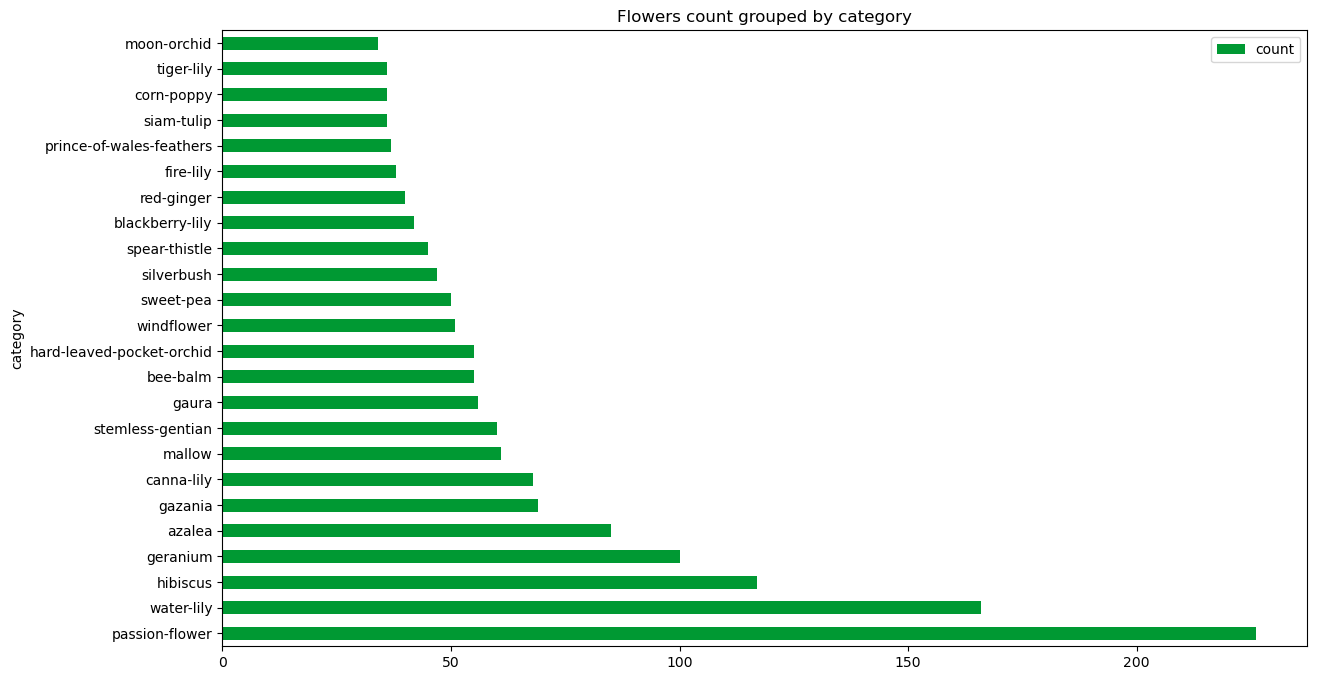

In [9]:
df_cat = df[['category']].groupby(['category'])['category']\
                             .count()\
                             .reset_index(name='count')\
                             .sort_values(['count'], ascending=False);
df_cat

df_cat.plot.barh(x='category', y='count', color='#009933', figsize=(14,8));
plt.title("Flowers count grouped by category");

Check for null values, there should not be any, but let us make sure.

In [10]:
df.isnull().sum()

n0          0
n1          0
n2          0
n3          0
n4          0
           ..
n2044       0
n2045       0
n2046       0
n2047       0
category    0
Length: 2049, dtype: int64

Corroborate with a grand total of nulls:

In [11]:
df.isnull().sum().sum()

0

Prepare X and y:

In [12]:
df_copy = df.copy()
# Identify X & y
y = df_copy[['category']]
X = df_copy.drop(labels=["category"], axis=1)

In [13]:
X

,n0,n1,n2,n3,n4,n5,n6,n7,n8,n9,...,n2038,n2039,n2040,n2041,n2042,n2043,n2044,n2045,n2046,n2047
2,0.3504636585712433,0.0938640609383583,0.7983770966529846,0.6084038615226746,0.9785415530204773,0.23260997235774994,0.017328955233097076,0.6554049849510193,0.00962686724960804,0.17767305672168732,...,0.7164676189422607,0.10895685106515884,0.00046633792226202786,0.10650479048490524,0.014420224353671074,0.013242087326943874,1.391684889793396,0.13622786104679108,0.6101861000061035,0.8039185404777527
3,0.13816016912460327,0.03224954381585121,1.3028169870376587,0.6343207359313965,0.7857036590576172,0.25814226269721985,0.1564691960811615,0.6087602376937866,0.19420085847377777,0.14608943462371826,...,0.4757750928401947,0.08079057186841965,0.0,0.06275472044944763,0.20260116457939148,0.22952209413051605,1.3673428297042847,1.1044305562973022,0.6384803652763367,0.38450726866722107
4,0.18509168922901154,0.03259287774562836,1.3997554779052734,0.3724135458469391,0.6311536431312561,0.08028822392225266,0.0027746360283344984,0.3137480914592743,0.09969492256641388,0.27347511053085327,...,0.975924551486969,0.05706389620900154,0.05320829525589943,0.08725196868181229,0.006477941758930683,0.03627980127930641,1.7720478773117065,0.38598716259002686,0.3593994379043579,0.6000104546546936
5,0.17522966861724854,0.008617336861789227,1.5310462713241577,0.17120158672332764,0.4303698241710663,0.10648146271705627,0.12426640093326569,0.7026468515396118,0.03608044609427452,0.4637209177017212,...,0.7933405041694641,0.6030479073524475,0.045113563537597656,0.20585797727108002,0.009222222492098808,0.30967235565185547,1.4879016876220703,0.23011276125907898,0.2032937854528427,0.47340381145477295
6,0.04724534973502159,0.22780020534992218,1.0396664142608643,0.18432116508483887,0.5757237076759338,0.047315243631601334,0.2392122894525528,0.23451948165893555,0.07058814913034439,0.037750568240880966,...,0.5174331068992615,0.3456989526748657,0.07481049001216888,0.11198794096708298,0.021402107551693916,0.20326846837997437,0.825471818447113,0.43324992060661316,0.6638912558555603,0.33717817068099976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1607,0.106887,0.154522,0.743871,0.503185,0.67325,0.017479,0.087993,0.787335,0.004472,0.082931,...,0.233952,0.277567,0.0,0.055569,0.000347,0.239264,0.100938,0.112664,0.041096,0.0695
1608,0.203937,0.082632,0.520509,0.610591,0.553318,0.002241,0.049273,0.356401,0.035481,0.083858,...,0.338184,0.315454,0.006371,0.060149,0.086983,0.229428,0.147914,0.457661,0.016464,0.098473
1609,0.153278,0.059221,0.720062,0.402319,0.457232,0.053827,0.118807,0.621211,0.004615,0.095909,...,0.625161,0.136814,0.025897,0.059207,0.021292,0.440939,1.03322,0.017644,0.115186,0.154158
1610,0.230262,0.226341,1.098367,1.052952,0.927374,0.117871,0.173736,0.97822,0.002011,0.017473,...,0.483967,0.253673,0.01621,0.001141,0.003262,0.121053,0.531536,0.274956,0.008775,0.499583


In [14]:
y

,category
2,azalea
3,azalea
4,azalea
5,azalea
6,azalea
...,...
1607,windflower
1608,windflower
1609,windflower
1610,windflower


- Generate training and test data at 80-20. I use stratify= y to ensure a correct proportion of each category.

In [15]:
# Split train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1288, 2048), (322, 2048), (1288, 1), (322, 1))

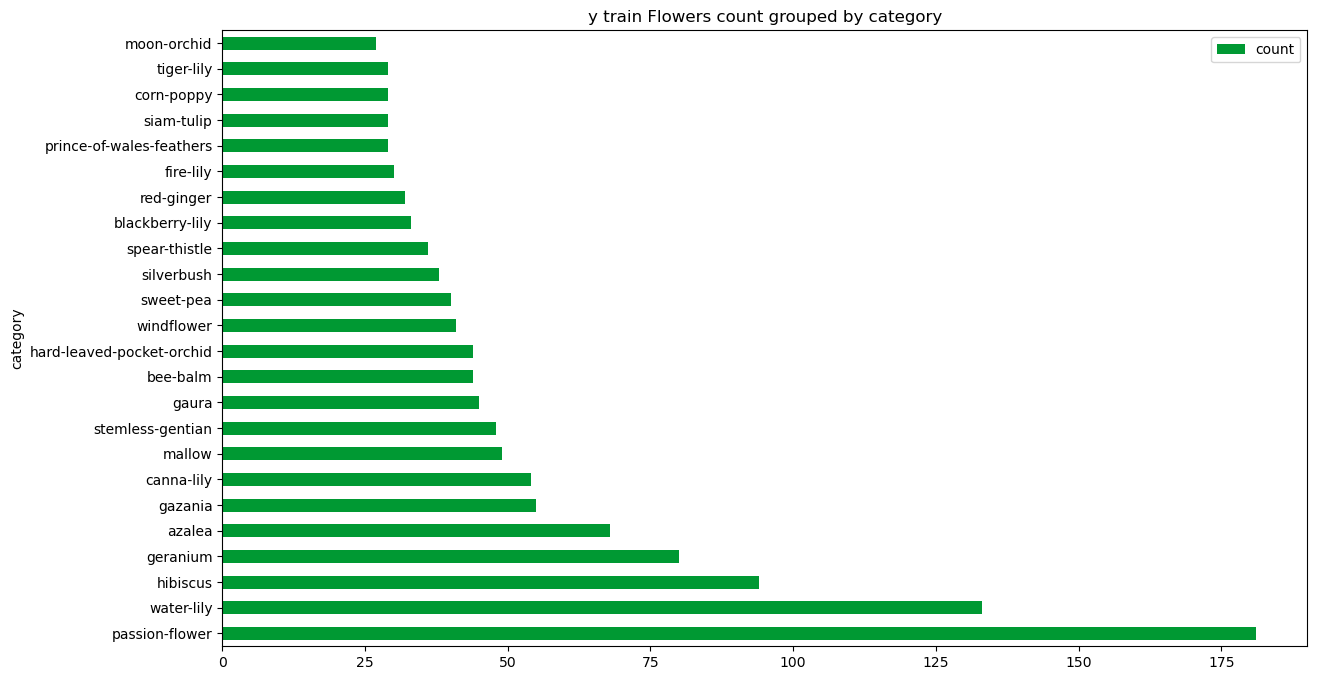

In [17]:
df_y_train = y_train[['category']].groupby(['category'])['category']\
                             .count()\
                             .reset_index(name='count')\
                             .sort_values(['count'], ascending=False);

df_y_train.plot.barh(x='category', y='count', color='#009933', figsize=(14,8));
plt.title("y train Flowers count grouped by category");

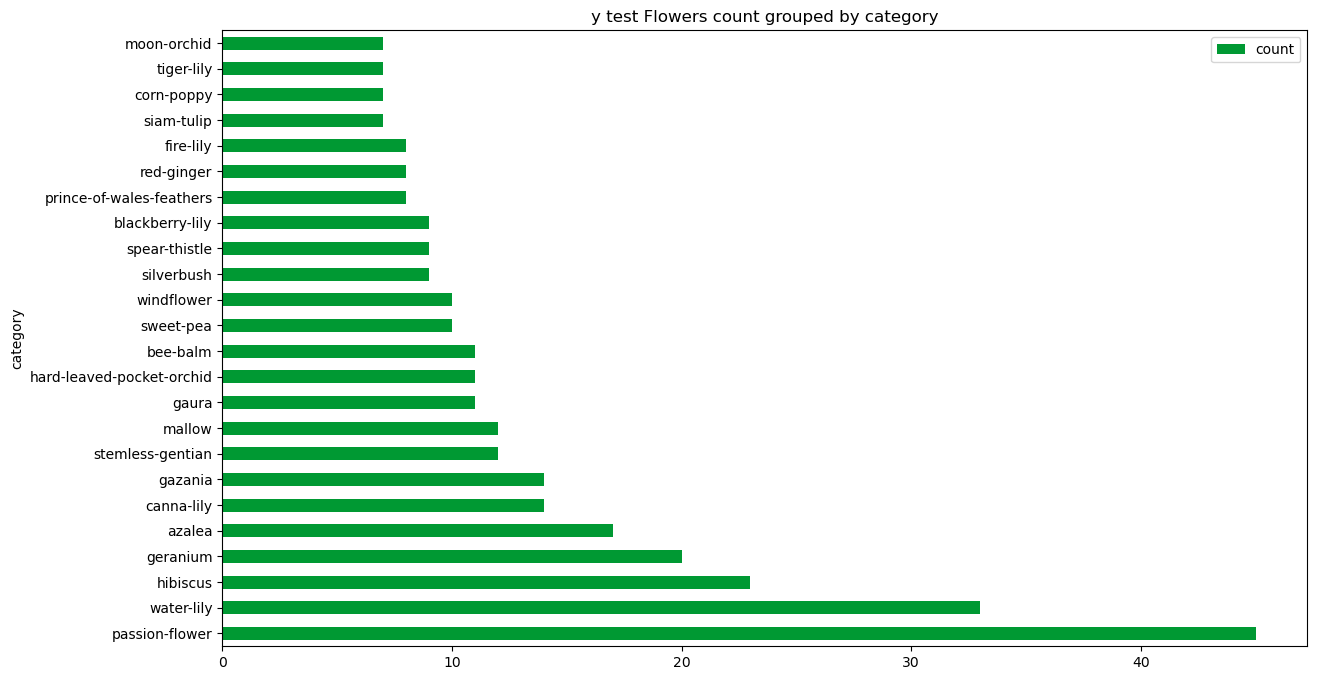

In [18]:
df_y_test = y_test[['category']].groupby(['category'])['category']\
                             .count()\
                             .reset_index(name='count')\
                             .sort_values(['count'], ascending=False);

df_y_test.plot.barh(x='category', y='count', color='#009933', figsize=(14,8));
plt.title("y test Flowers count grouped by category");

The train and test sets have a proportional count for each category.

# 3. Model Creation


<span style="color:maroon">
    
- Try at least two variants for each of the following classifiers:
    - Logistic Regression 
    - Neural Networks 
    - SVM
    - Random Forest
    
</span>

In [19]:
rf = RandomForestClassifier(n_estimators=10)

In [20]:
d = {'Model':[], 'Accuracy':[]}
df_results = pd.DataFrame(data=d)

# 4. Adjust Model with Historic Data

In [21]:
rf.fit(X_train, y_train['category'])

RandomForestClassifier(n_estimators=10)

# 5. Prediction for new Data

In [22]:
rf_y_predict = rf.predict(X_test)

# 6. Visualization of Results

- Measure the performance of the models and their variants, obtain and analyze the confusion matrix.

In [23]:
d = {'Model':     'rf',
     'Accuracy':  rf.score(X_test, y_test['category'])}
df_results = df_results.append(d, ignore_index = True)


df_results

C:\Users\is688\AppData\Local\Temp\ipykernel_9024\3147901849.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(d, ignore_index = True)


,Model,Accuracy
0,rf,0.732919


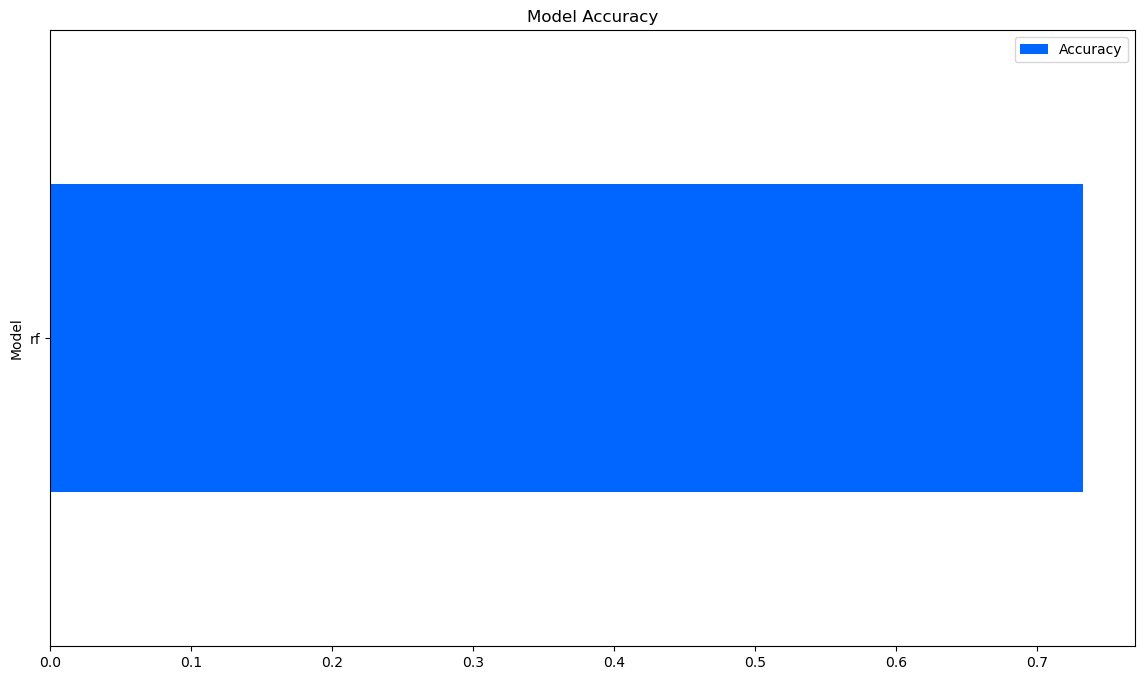

In [24]:
df_results = df_results.sort_values(by=['Accuracy'])
df_results.plot.barh(x='Model', y='Accuracy', color='#0066ff', figsize=(14,8));
plt.title("Model Accuracy");

### Confusion Matrix of test set

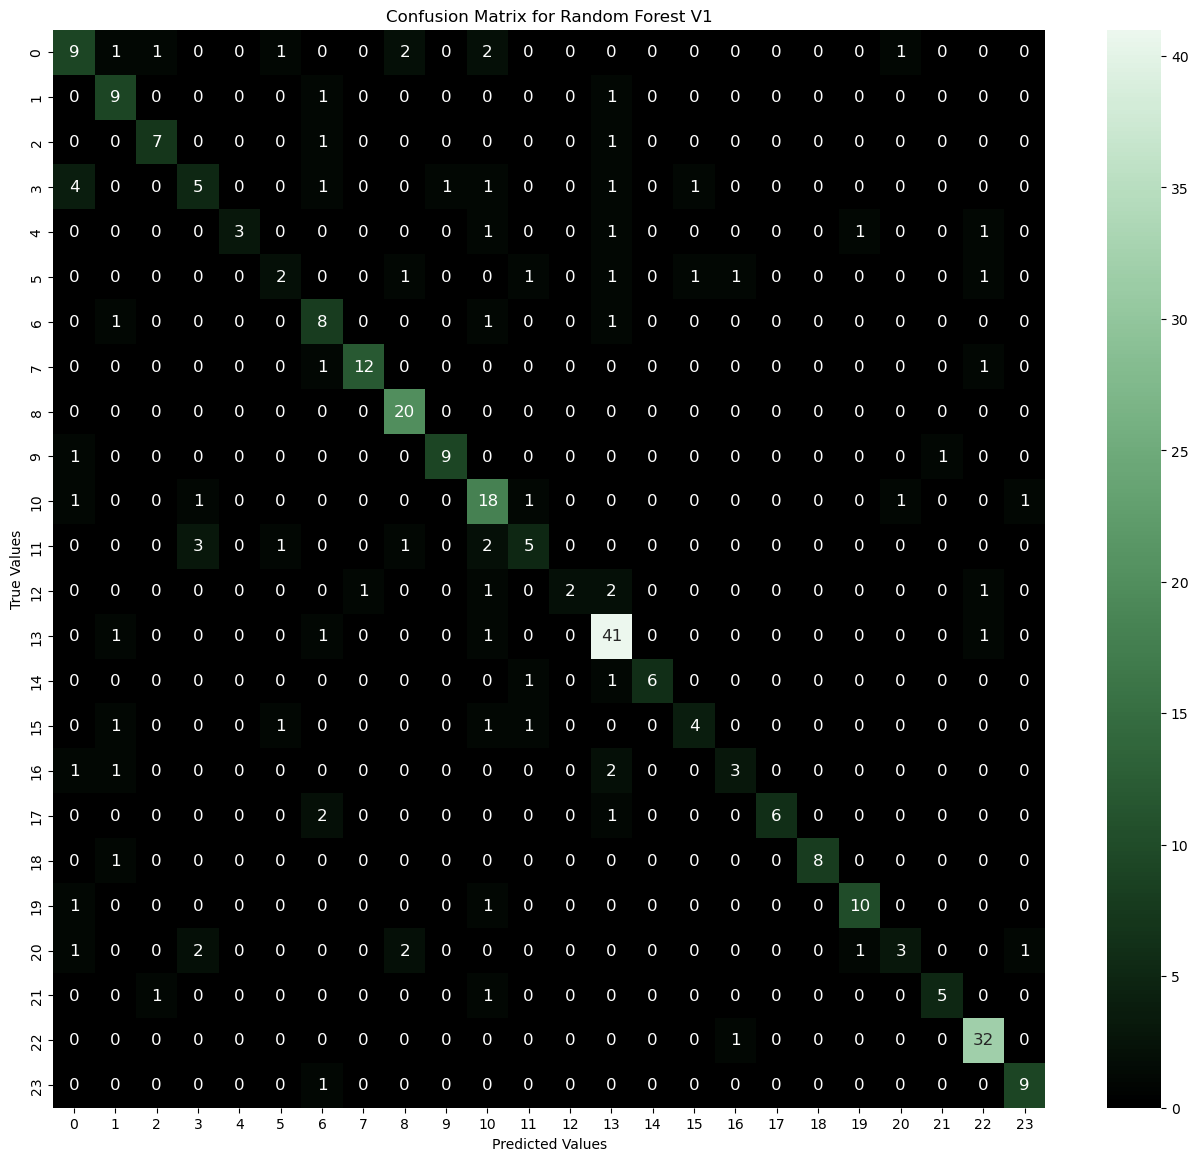

In [25]:
chpalette = sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
draw_confusion_matrix(y_test['category'], rf_y_predict, chpalette, 'Confusion Matrix for Random Forest V1')

In [26]:
categories = y_test.groupby(['category'])['category'].count().reset_index(name='count')
categories

,category,count
0,azalea,17
1,bee-balm,11
2,blackberry-lily,9
3,canna-lily,14
4,corn-poppy,7
5,fire-lily,8
6,gaura,11
7,gazania,14
8,geranium,20
9,hard-leaved-pocket-orchid,11


- With which flower type were the best results achieved? 
    

- Which model obtained the best results? 
    
- How do you think you can improve the results obtained? 
    
- How do the results vary between the training and test data sets?
    

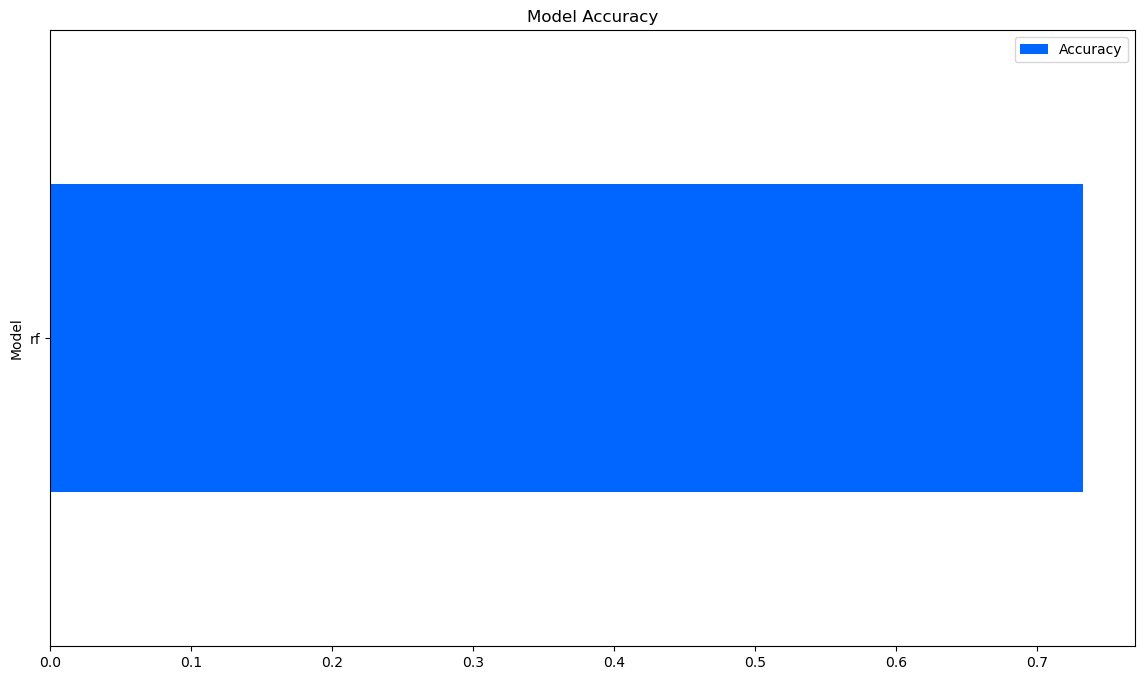

In [27]:
df_results.plot.barh(x='Model', y='Accuracy', color='#0066ff', figsize=(14,8));
plt.title("Model Accuracy");

However, using the training data:

In [28]:
d = {'Model':[], 'Accuracy with Train Data':[]}
df_results = pd.DataFrame(data=d)

d = {'Model':     'rf',
     'Accuracy with Train Data':  rf.score(X_train, y_train['category'])}
df_results = df_results.append(d, ignore_index = True)

df_results = df_results.sort_values(by=['Accuracy with Train Data'])

df_results

C:\Users\is688\AppData\Local\Temp\ipykernel_9024\4189777402.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(d, ignore_index = True)


,Model,Accuracy with Train Data
0,rf,0.998447


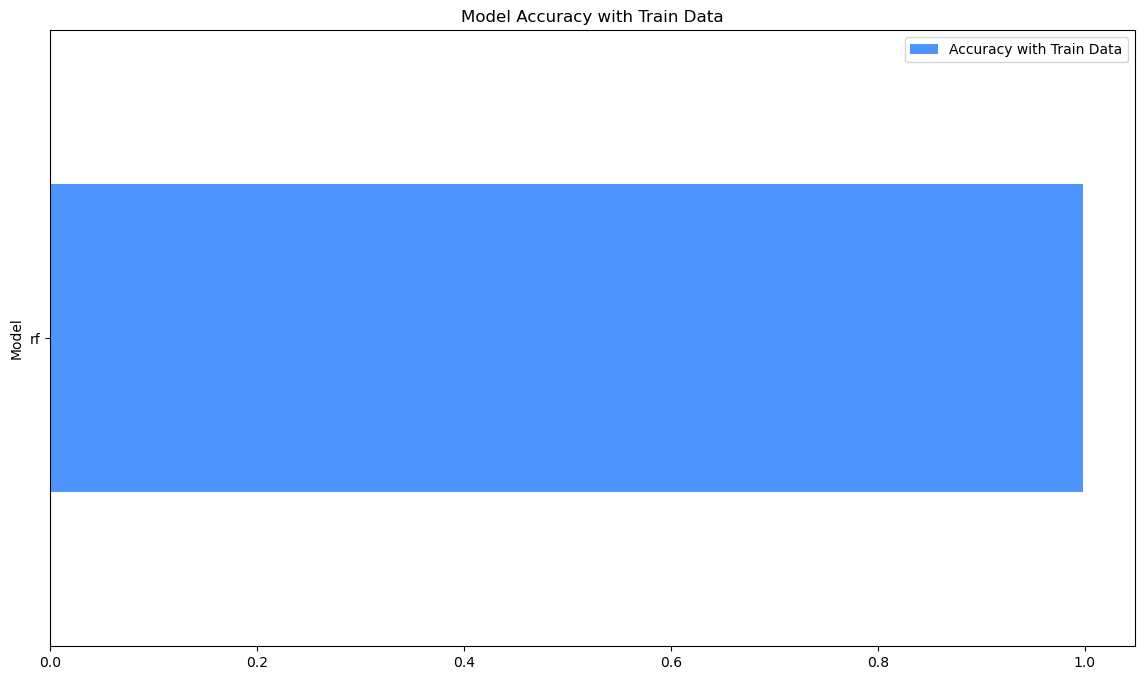

In [29]:
df_results.plot.barh(x='Model', y='Accuracy with Train Data', color='#4d94ff', figsize=(14,8));
plt.title("Model Accuracy with Train Data");

Remarks:

### Confusion Matrix of train set

In [30]:
rf_y_predict = rf.predict(X_train)

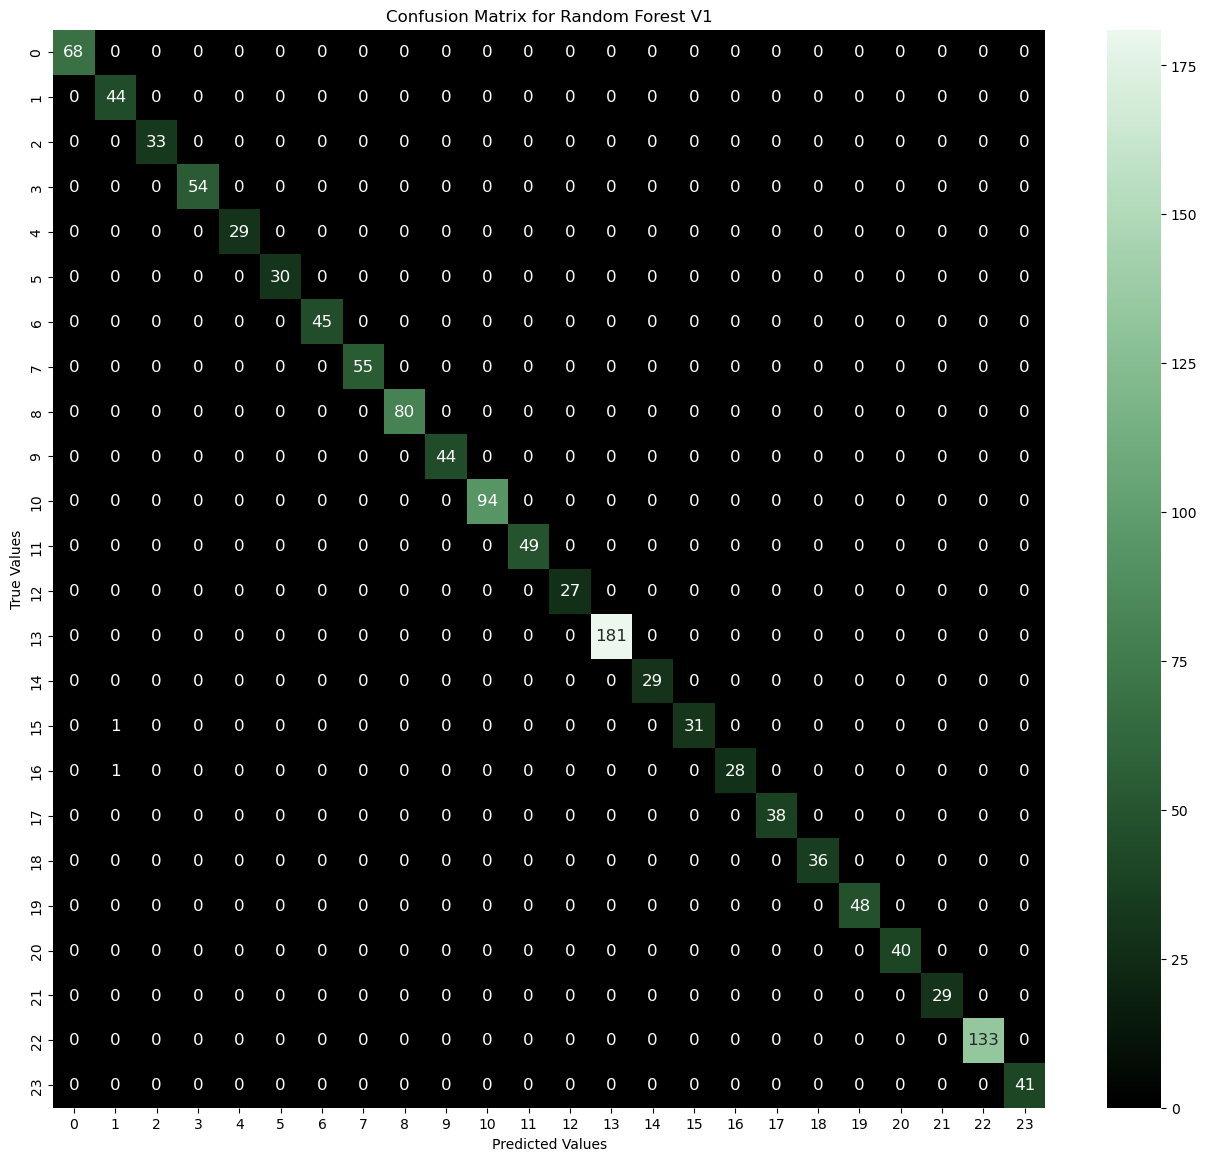

In [31]:
chpalette = sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
draw_confusion_matrix(y_train['category'], rf_y_predict, chpalette, 'Confusion Matrix for Random Forest V1')

Actual result remarks?????

# References

1. Professor Plum, Ph.D., Oxford 102 Flower Pytorch, Kaggle, 2019, https://www.kaggle.com/c/oxford-102-flower-pytorch/data?select=sample_submission.csv
2. Maria-Elena Nilsback and Andrew Zisserman, 102 Category Flower Dataset, Proceedings of the Indian Conference on Computer Vision, Graphics and Image Processing, 2008, https://www.robots.ox.ac.uk/~vgg/data/flowers/102/